In [3]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

# Import the datetime module from the datetime library.
from datetime import datetime

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cc73567ca04a213a67034d5e8202e89c


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

640

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | nikolskoye
Processing Record 2 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 13 | tasiilaq
Processing Record 4 of Set 13 | cidreira
Processing Record 5 of Set 13 | hofn
Processing Record 6 of Set 13 | dingle
Processing Record 7 of Set 13 | avarua
Processing Record 8 of Set 13 | lompoc
Processing Record 9 of Set 13 | tuktoyaktuk
Processing Record 10 of Set 13 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 13 | vaini
Processing Record 12 of Set 13 | saint-francois
Processing Record 13 of Set 13 | atikokan
Processing Record 14 of Set 13 | punta arenas
Processing Record 15 of Set 13 | sentyabrskiy
City not found. Skipping...
Processing Record 16 of Set 13 | carmen
Processing Record 17 of Set 13 | tagusao
Processing Record 18 of Set 13 | san jeronimo
Processing Record 19 of Set 13 | rikitea
Processing Record 20 of Set 13 | pisco
Proc

Processing Record 32 of Set 16 | dikson
Processing Record 33 of Set 16 | tariba
Processing Record 34 of Set 16 | saskylakh
Processing Record 35 of Set 16 | tual
Processing Record 36 of Set 16 | griffith
Processing Record 37 of Set 16 | hilo
Processing Record 38 of Set 16 | tuy hoa
Processing Record 39 of Set 16 | bilibino
Processing Record 40 of Set 16 | lagoa
Processing Record 41 of Set 16 | clyde river
Processing Record 42 of Set 16 | port blair
Processing Record 43 of Set 16 | tuggurt
City not found. Skipping...
Processing Record 44 of Set 16 | tamworth
Processing Record 45 of Set 16 | huarmey
Processing Record 46 of Set 16 | dolinsk
Processing Record 47 of Set 16 | hithadhoo
Processing Record 48 of Set 16 | amapa
Processing Record 49 of Set 16 | diffa
Processing Record 50 of Set 16 | constitucion
Processing Record 1 of Set 17 | castro
Processing Record 2 of Set 17 | guder
Processing Record 3 of Set 17 | ihosy
Processing Record 4 of Set 17 | amderma
City not found. Skipping...
Proce

Processing Record 22 of Set 20 | tiarei
Processing Record 23 of Set 20 | slave lake
Processing Record 24 of Set 20 | yichang
Processing Record 25 of Set 20 | okhotsk
Processing Record 26 of Set 20 | touros
Processing Record 27 of Set 20 | manta
Processing Record 28 of Set 20 | menemen
Processing Record 29 of Set 20 | shebunino
Processing Record 30 of Set 20 | mananjary
Processing Record 31 of Set 20 | adrar
Processing Record 32 of Set 20 | tabiauea
City not found. Skipping...
Processing Record 33 of Set 20 | knysna
Processing Record 34 of Set 20 | santa luzia
Processing Record 35 of Set 20 | usinsk
Processing Record 36 of Set 20 | karasjok
Processing Record 37 of Set 20 | port augusta
Processing Record 38 of Set 20 | palmer
Processing Record 39 of Set 20 | verin
Processing Record 40 of Set 20 | iskateley
Processing Record 41 of Set 20 | melfort
Processing Record 42 of Set 20 | sorvag
City not found. Skipping...
Processing Record 43 of Set 20 | yarke pole
Processing Record 44 of Set 20 

Processing Record 7 of Set 24 | melito di porto salvo
Processing Record 8 of Set 24 | marsa matruh
Processing Record 9 of Set 24 | kambam
Processing Record 10 of Set 24 | jiaojiang
Processing Record 11 of Set 24 | santa maria
Processing Record 12 of Set 24 | zheleznodorozhnyy
Processing Record 13 of Set 24 | camana
Processing Record 14 of Set 24 | changji
Processing Record 15 of Set 24 | kembolcha
Processing Record 16 of Set 24 | makarov
Processing Record 17 of Set 24 | chimbote
Processing Record 18 of Set 24 | krasnoarmeysk
Processing Record 19 of Set 24 | biak
Processing Record 20 of Set 24 | la rioja
Processing Record 21 of Set 24 | pontevedra
Processing Record 22 of Set 24 | emba
Processing Record 23 of Set 24 | fort saint john
City not found. Skipping...
Processing Record 24 of Set 24 | sorland
Processing Record 25 of Set 24 | yumen
Processing Record 26 of Set 24 | batagay
Processing Record 27 of Set 24 | uarini
Processing Record 28 of Set 24 | mattru
Processing Record 29 of Set 2

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nikolskoye,59.7035,30.7861,87.87,32,42,8.66,RU,2022-08-24 14:52:39
1,Tasiilaq,65.6145,-37.6368,40.42,68,37,0.92,GL,2022-08-24 14:52:40
2,Cidreira,-30.1811,-50.2056,67.39,64,98,5.84,BR,2022-08-24 14:52:40
3,Hofn,64.2539,-15.2082,51.78,79,100,9.35,IS,2022-08-24 14:52:40
4,Dingle,10.9995,122.6711,77.11,90,99,1.74,PH,2022-08-24 14:52:41
5,Avarua,-21.2078,-159.7750,71.65,78,20,6.91,CK,2022-08-24 14:50:15
6,Lompoc,34.6391,-120.4579,56.61,100,100,3.44,US,2022-08-24 14:52:41
7,Tuktoyaktuk,69.4541,-133.0374,51.80,87,100,9.22,CA,2022-08-24 14:52:42
8,Vaini,-21.2000,-175.2000,69.96,94,40,4.61,TO,2022-08-24 14:52:42
9,Saint-Francois,46.4154,3.9054,89.04,23,0,9.22,FR,2022-08-24 14:52:43


In [10]:
len(city_data_df)

587

In [11]:
# Arrange Columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [12]:
# Updated Data Frame
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2022-08-24 14:52:39,59.7035,30.7861,87.87,32,42,8.66
1,Tasiilaq,GL,2022-08-24 14:52:40,65.6145,-37.6368,40.42,68,37,0.92
2,Cidreira,BR,2022-08-24 14:52:40,-30.1811,-50.2056,67.39,64,98,5.84
3,Hofn,IS,2022-08-24 14:52:40,64.2539,-15.2082,51.78,79,100,9.35
4,Dingle,PH,2022-08-24 14:52:41,10.9995,122.6711,77.11,90,99,1.74
5,Avarua,CK,2022-08-24 14:50:15,-21.2078,-159.7750,71.65,78,20,6.91
6,Lompoc,US,2022-08-24 14:52:41,34.6391,-120.4579,56.61,100,100,3.44
7,Tuktoyaktuk,CA,2022-08-24 14:52:42,69.4541,-133.0374,51.80,87,100,9.22
8,Vaini,TO,2022-08-24 14:52:42,-21.2000,-175.2000,69.96,94,40,4.61
9,Saint-Francois,FR,2022-08-24 14:52:43,46.4154,3.9054,89.04,23,0,9.22


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data\cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

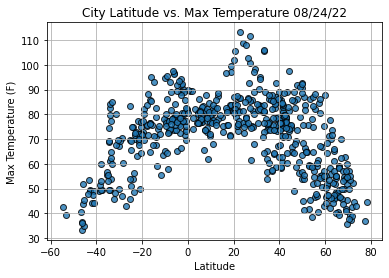

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

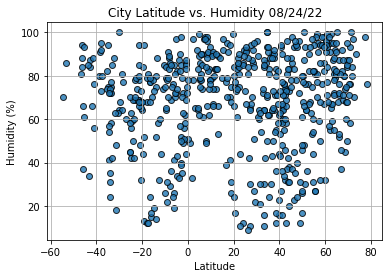

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

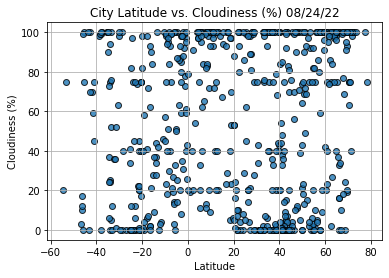

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

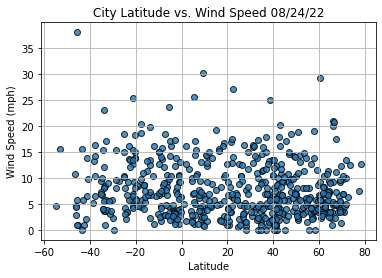

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [26]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [27]:
# Locate City by Index
index13 = city_data_df.loc[13]
index13

City                      Tagusao
Country                        PH
Date          2022-08-24 14:52:44
Lat                        9.1924
Lng                      117.8141
Max Temp                    80.19
Humidity                       83
Cloudiness                    100
Wind Speed                   6.64
Name: 13, dtype: object

In [31]:
# Filter Data by Latitude (Northern Hemisphere)
city_data_df.loc[(city_data_df["Lat"] >= 0)].head(5)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nikolskoye,RU,2022-08-24 14:52:39,59.7035,30.7861,87.87,32,42,8.66
1,Tasiilaq,GL,2022-08-24 14:52:40,65.6145,-37.6368,40.42,68,37,0.92
3,Hofn,IS,2022-08-24 14:52:40,64.2539,-15.2082,51.78,79,100,9.35
4,Dingle,PH,2022-08-24 14:52:41,10.9995,122.6711,77.11,90,99,1.74
6,Lompoc,US,2022-08-24 14:52:41,34.6391,-120.4579,56.61,100,100,3.44


In [32]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

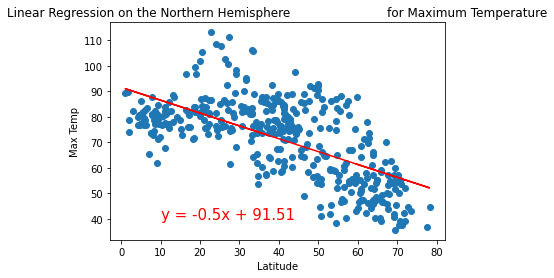

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

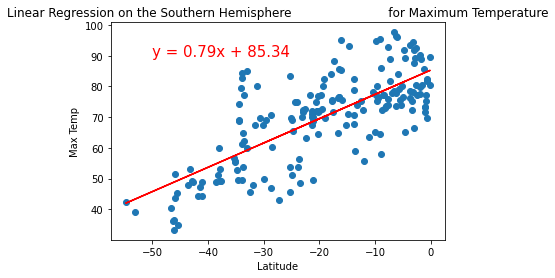

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

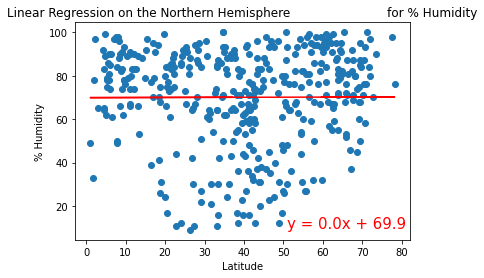

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(51,10))

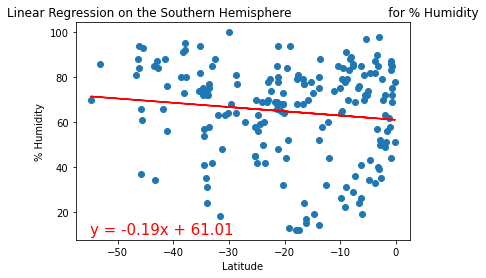

In [49]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-55,10))

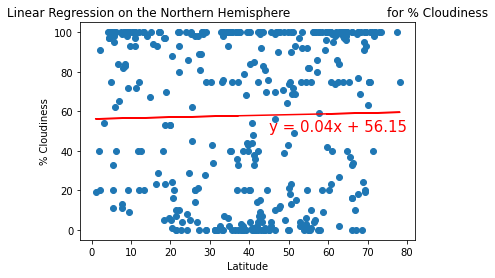

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(45,50))

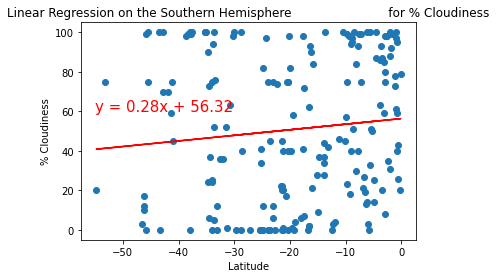

In [61]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-55,60))

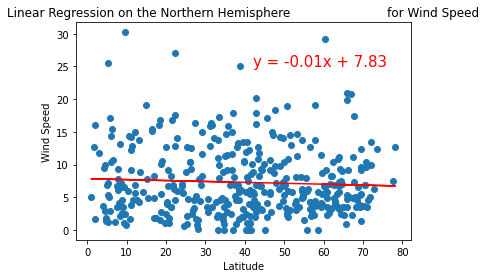

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(42,25))

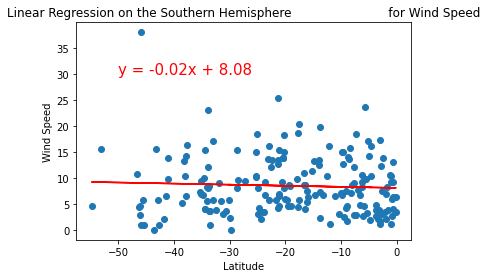

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))